In [1]:
# [1] COLLECT ALL GROUND TRUTH DATA
import collections
from plot_overlap_ratios import plot_ratio_success
from algorithm_output_parser import process_algorithm_output
from algorithm_output_parser import toboggan_output_parser
from algorithm_output_parser import catfish_output_parser

from load_all_data import get_all_data


show_flag = False


# [1] get all data
all_path_info, all_toboggan_data = get_all_data( [0,1,2] )
froots = ['human', 'mouse', 'zebra']

Loading human
Loading mouse
Loading zebra
Done with get_all_data



In [2]:
gt_pathset_dict = []
all_catfish_paths = []
all_toboggan_paths = []
all_stats = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]
indices_identical = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]
indices_different = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]
indices_timeout = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]

for which_dataset in [0,1,2]:
    #     # FILTER ALGORITHM OUTPUTS FOR RELEVANT DATA
    froot = froots[which_dataset]
    gt_pathset_dict = all_path_info['groundtruth'][froot].copy()
    all_catfish_paths = all_path_info['catfish'][froot]
    all_toboggan_paths = all_path_info['toboggan'][froot]
    
    non_opt_groundtruth_list = []
    for key, path in gt_pathset_dict.items():
        kpath = all_toboggan_paths[key]
        if len(kpath) != len(path):
            non_opt_groundtruth_list.append(key)
    for badkey in non_opt_groundtruth_list:
        gt_pathset_dict.pop(badkey, None)
            
    
    j = which_dataset
    all_stats[j][0], indices_identical[j][0], indices_different[j][0], indices_timeout[j][0] = process_algorithm_output(gt_pathset_dict, all_catfish_paths)
    all_stats[j][1], indices_identical[j][1], indices_different[j][1], indices_timeout[j][1] = process_algorithm_output(gt_pathset_dict, all_toboggan_paths)
    

Num timeouts = 0
Num timeouts = 0
Num timeouts = 0
Num timeouts = 0
Num timeouts = 0
Num timeouts = 0


In [3]:
# combine all datasets
# data1 = numpy.array(stats[:,0])  # size of ground truth pathset
# data2 = numpy.array(stats[inds_identical, 0])  # size of ground truth pathset when algorithm identical
alg_names = ['catfish', 'toboggan']
combined_stats = [[],[]]
combined_identicals = [[],[]]
for idx_alg, which_alg in enumerate(alg_names):
    for idx_froot, froot in enumerate(froots):
        print( idx_alg, idx_froot)
        combined_stats[idx_alg].extend( [ int(x) for x in all_stats[idx_froot][idx_alg][:,0] ]  )
        combined_identicals[idx_alg].extend( [int(x) for x in all_stats[idx_froot][idx_alg][indices_identical[idx_froot][idx_alg],0]] )


0 0
0 1
0 2
1 0
1 1
1 2


In [ ]:
# Make table
import numpy

    
alg_names = ['catfish', 'toboggan']
individual_stats = {}
individual_identicals = {} 
data_by_size = {}
for idx_froot, froot in enumerate(froots):
    individual_stats[froot] = [[],[]]
    individual_identicals[froot] = [[],[]]
    for idx_alg, which_alg in enumerate(alg_names):
        print( idx_alg, idx_froot, froot)
        individual_stats[froot][idx_alg].extend( [ int(x) for x in all_stats[idx_froot][idx_alg][:,0] ]  )
        individual_identicals[froot][idx_alg].extend( [int(x) for x in all_stats[idx_froot][idx_alg][indices_identical[idx_froot][idx_alg],0]] )
        
    data_by_size[froot] = {}
    for size, count in collections.Counter(numpy.array(individual_stats[froot][0])).items():
        data_by_size[froot][size] = [count]
    total_num = sum( [ val[0] for val in data_by_size[froot].values() ] )
    for which_alg in range(len(alg_names)):
        all_counter = collections.Counter(numpy.array(individual_stats[froot][which_alg]))
        identical_counter = collections.Counter(numpy.array(individual_identicals[froot][which_alg]))
        for size, count in identical_counter.items():
            data_by_size[froot][size].append(count/data_by_size[froot][size][0])

In [26]:
for froot in froots:
    max_size = max(data_by_size[froot].keys())
    ordered_list = [0 for x in range(0,max_size-2+1)]
    for size, val in data_by_size[froot].items():
        ordered_list[size-2] = [ size, *val ]
    print("{} & {}  &  {} &  {}  \\\\".format("size", "instances", "catfish", "toboggan"))
    print("\\midrule")
    for row in ordered_list:
        inst_size = row[0]
        num_inst = row[1]
        catfish = row[2]
        toboggan = row[3]
        if inst_size < 5:
            continue
        print(" {:2d} & {:12d} & {:7.2f}\% & {:7.2f}\% \\\\".format(inst_size, num_inst, 100*catfish, 100*toboggan))

size & instances  &  catfish &  toboggan  \\
\midrule
  5 &        25885 &   89.70\% &   89.18\% \\
  6 &        11767 &   84.59\% &   84.52\% \\
  7 &         5188 &   80.51\% &   79.51\% \\
  8 &         2219 &   76.61\% &   76.48\% \\
  9 &          980 &   73.37\% &   74.80\% \\
 10 &           46 &   76.09\% &   84.78\% \\
size & instances  &  catfish &  toboggan  \\
\midrule
  5 &        19431 &   88.00\% &   88.02\% \\
  6 &         8751 &   82.13\% &   81.34\% \\
  7 &         3952 &   77.63\% &   76.82\% \\
  8 &         1766 &   77.29\% &   77.01\% \\
  9 &          740 &   75.14\% &   74.59\% \\
 10 &           31 &   67.74\% &   74.19\% \\
size & instances  &  catfish &  toboggan  \\
\midrule
  5 &         5060 &   85.53\% &   84.19\% \\
  6 &         1662 &   76.53\% &   74.85\% \\
  7 &          523 &   69.98\% &   66.73\% \\
  8 &          183 &   71.04\% &   71.04\% \\
  9 &           70 &   70.00\% &   64.29\% \\
 10 &           24 &   83.33\% &   79.17\% \\
 11 &     

In [48]:
# PLOT: GROUDTRUTH RECOVERY -- main image

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import collections
figurename = 'groundtruth-recovery-'

def rebin_above_counter(input_counter, threshold=5):
    temp_ddict = collections.defaultdict(int)
    threshold_dict = collections.defaultdict(int)
    for key, val in input_counter.items():
        if key >= threshold:
            threshold_dict[threshold] += val
        else:
            temp_ddict[key] = val
    return temp_ddict, threshold_dict

def rebin_below_counter(input_counter, threshold=5):
    temp_ddict = collections.defaultdict(int)
    threshold_dict = collections.defaultdict(int)
    for key, val in input_counter.items():
        if key < threshold:
            threshold_dict[threshold] += val
        else:
            temp_ddict[key] = val
    return temp_ddict, threshold_dict

def get_font_info():
    yaxis_font_size = 12
    xaxis_font_size = 13
    legend_font_size = 10
    axis_font = {'fontname':'DejaVu Sans', 'size':'{}'.format(xaxis_font_size)}
    title_font = {'fontname':'DejaVu Sans', 'size':'16'}
    xtick_font = 9
    ytick_font = 9
    return yaxis_font_size, xaxis_font_size, legend_font_size, axis_font, title_font, xtick_font, ytick_font

def plot_recovery_outset(figurename, all_stats, identical_stats, counter_cutoff=5, show_flag=True, figtitle=''):

    def tally_ratios_and_counts(all_counter, identical_counter):
        data_ratios = []
        soln_sizes = []
        num_datapoints = []
        for soln_size, x in all_counter.items():
            y = identical_counter[soln_size]
            if x != 0:
                data_ratios.append(y/x)
                num_datapoints.append(int(x))
                soln_sizes.append(int(soln_size))
        return data_ratios, soln_sizes, num_datapoints
                
    # [1] collect data
    alg_names = ['catfish', 'toboggan']
    ratio_correctness_both = {}
    soln_sizes_both = {}
    num_datapoints_both = {}
    ratio_correctness_outliers = {}
    
    for which_alg in range(len(alg_names)):

        all_counter = collections.Counter(numpy.array(all_stats[which_alg]))
        identical_counter = collections.Counter(numpy.array(identical_stats[which_alg]))
        # Move all datapoints of size > counter_cutoff into the last bin
        all_counter, threshold_all_counter = rebin_above_counter(all_counter, counter_cutoff)
        identical_counter, threshold_identical_counter = rebin_above_counter(identical_counter, counter_cutoff)
        ratio_correctness_both[which_alg], soln_sizes_xdata, instance_count_ydata = tally_ratios_and_counts(all_counter, identical_counter)
        ratio_correctness_outliers[which_alg], soln_sizes_outliers_xdata, outliers_count_ydata = tally_ratios_and_counts(threshold_all_counter, threshold_identical_counter)

    # [1.1] get bar heights for "instance count by decomp size"
    #   x = soln_sizes_xdata
    #   y = instance_ratio_bar_heights_ydata
    total_num_instances = sum(instance_count_ydata)
    instance_ratio_bar_heights_ydata = list(numpy.array(instance_count_ydata)/total_num_instances)
    outlier_ratio_bar_heights_ydata = list(numpy.array(outliers_count_ydata)/total_num_instances)
    
    # [2] Set up both axes
    plt.close()
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.gca()
    fig = plt.gcf()

    color_toboggan =  tuple( x/256 for x in [212,170,0] ) # cm.colors[0]
    color_catfish = tuple( x/256 for x in [0.0,160.0,212.0] ) # cm.colors[3]
    color_average = tuple( x/512 for x in [212,340,212] )
    colors = [color_catfish, color_toboggan]
    decomp_size_color = tuple([ x/256 for x in [220,220,220] ] )
    
    yaxis_font_size, xaxis_font_size, legend_font_size, axis_font, title_font, xtick_font, ytick_font = get_font_info()
    
    width = 0.3       # the width of the bars
    top_zorder = 10
    bottom_zorder = 1
    percent_or_ratio_scalar = 100 # change to 1 to make ratio instead of percent

    # [3] PLOT MAIN DATA
    # [3.1] Plot bar silhouette for instance ratios
    ydata = [ x*percent_or_ratio_scalar for x in instance_ratio_bar_heights_ydata ]
    plt.bar( soln_sizes_xdata, ydata, 2*width, color='none',
            edgecolor='black', linewidth=0.5, zorder=top_zorder, label='ground truth')
    
    # [3.2] Make colored bars for toboggan / catfish
    scaled_data_both = ratio_correctness_both.copy()
    for idx in range(len(instance_count_ydata)):
        scaled_data_both[0][idx] *= ydata[idx]
        scaled_data_both[1][idx] *= ydata[idx]
    which_alg = 0            
    plt.bar([x-width/2 for x in soln_sizes_xdata ], scaled_data_both[which_alg], width,
            alpha=1, color=colors[which_alg], label=alg_names[which_alg], zorder=bottom_zorder)
    which_alg = 1
    plt.bar( [x+width/2 for x in soln_sizes_xdata ], scaled_data_both[which_alg], width,
             alpha=1, color=colors[which_alg], label=alg_names[which_alg], zorder=bottom_zorder)

    # [4] PLOT OUTLIER BARS
    # [4.1] Plot bar silhouette for instance ratios
    ydata = [ x*percent_or_ratio_scalar for x in outlier_ratio_bar_heights_ydata ]
    plt.bar( soln_sizes_outliers_xdata, ydata, 2*width, color='none',
            edgecolor='black', linewidth=0.5, zorder=top_zorder)
    
    # [4.2] Make colored bars for toboggan / catfish
    scaled_data_both = ratio_correctness_outliers.copy()
    for idx in range(len(outliers_count_ydata)):
        scaled_data_both[0][idx] *= ydata[idx]
        scaled_data_both[1][idx] *= ydata[idx]
    which_alg = 0            
    plt.bar([x-width/2 for x in soln_sizes_outliers_xdata ], scaled_data_both[which_alg], width,
            alpha=1, color=colors[which_alg], zorder=bottom_zorder, hatch='//////')
    which_alg = 1
    plt.bar( [x+width/2 for x in soln_sizes_outliers_xdata ], scaled_data_both[which_alg], width,
             alpha=1, color=colors[which_alg], zorder=bottom_zorder, hatch='\\\\\\\\\\\\')
    mpl.rcParams['hatch.color'] = 'white'
    mpl.rcParams['hatch.linewidth'] = 2.25

    annotation_text = 'see\ninset'
    if figtitle != '':
        annotation_text = 'see\ntable'
    plt.annotate(annotation_text, xy=(counter_cutoff, .3*percent_or_ratio_scalar), xytext=(counter_cutoff, .11*percent_or_ratio_scalar), fontsize=9, fontstyle='italic', horizontalalignment='center' )

    # MODIFY AXES
    #   X-AXIS
    plt.xlabel("Decomposition size (k)", **axis_font)
    xlims = plt.xlim()
    # Determine xlims
    xlimmin = xlims[0]
    xlimmax = max(soln_sizes_xdata) + 1.5
    plt.xlim([xlimmin, xlimmax])
    ax.tick_params('x', labelsize=xtick_font)
    ax.set_xticks( [x for x in range(2,counter_cutoff+1) ] )
    new_xticklabels = [str(x) for x in list(range(2, counter_cutoff))]
    new_xticklabels.extend( ['{}+'.format(counter_cutoff)] )
    ax.set_xticklabels( new_xticklabels )
    
    #   Y-AXIS
    plt.ylabel("Percent of instances", color='black')
    plt.gca().yaxis.label.set_size(yaxis_font_size)
    # ax.set_yticks([])
    plt.ylim([0,percent_or_ratio_scalar])
    
    plt.legend(loc='upper right', frameon=False, prop={'size':legend_font_size})#, handles=ax1, labels=alg_names)
    ax.tick_params('y', colors='black', labelsize=ytick_font)

    plt.title(figtitle, **title_font)
    fig.tight_layout()

    # REMOVE SPINES
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.set_axis_bgcolor(tuple([x/256 for x in [247,247,247] ]))
    # deprecated
    ax.set_facecolor(tuple([x/256 for x in [229,229,229] ]))
    

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off')
    
    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, '.pdf']), format='pdf', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, '.svg']), format='svg', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))

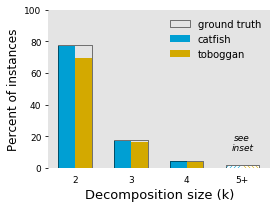

Done with plot all-recovery-stats-outset
Done with plot all-recovery-stats-outset


In [49]:
counter_cutoff = 5

plot_recovery_outset('all-recovery-stats-outset', combined_stats.copy(), combined_identicals.copy(), counter_cutoff, True)
plot_recovery_outset('all-recovery-stats-outset', combined_stats.copy(), combined_identicals.copy(), counter_cutoff, False)

In [42]:
# PLOT: GROUDTRUTH RECOVERY -- inset image

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import collections

def plot_recovery_inset(figurename, all_stats, identical_stats, counter_cutoff=5, show_flag=True):

    def tally_ratios_and_counts(all_counter, identical_counter):
        data_ratios = []
        soln_sizes = []
        num_datapoints = []
        for soln_size, x in all_counter.items():
            y = identical_counter[soln_size]
            if x != 0:
                data_ratios.append(y/x)
                num_datapoints.append(int(x))
                soln_sizes.append(int(soln_size))
        return data_ratios, soln_sizes, num_datapoints
                
    # [1] collect data
    alg_names = ['catfish', 'toboggan']
    ratio_correctness_both = {}
    soln_sizes_both = {}
    num_datapoints_both = {}
    
    for which_alg in range(len(alg_names)):
        all_counter = collections.Counter(numpy.array(all_stats[which_alg]))
        total_num_instances = sum(all_counter.values())
        identical_counter = collections.Counter(numpy.array(identical_stats[which_alg]))
        # Move all datapoints of size > counter_cutoff into the last bin
        all_counter, threshold_all_counter = rebin_below_counter(all_counter, counter_cutoff)
        identical_counter, threshold_identical_counter = rebin_below_counter(identical_counter, counter_cutoff)
        ratio_correctness_both[which_alg], soln_sizes_xdata, instance_count_ydata = tally_ratios_and_counts(all_counter, identical_counter)
        print(all_counter)
    # [1.1] get bar heights for "instance count by decomp size"
    #   x = soln_sizes_xdata
    #   y = instance_ratio_bar_heights_ydata
    instance_ratio_bar_heights_ydata = list(numpy.array(instance_count_ydata)/total_num_instances)
    
    # [2] Set up both axes
    plt.close()
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.gca()
    fig = plt.gcf()

    color_toboggan =  tuple( x/256 for x in [212,170,0] ) # cm.colors[0]
    color_catfish = tuple( x/256 for x in [0.0,160.0,212.0] ) # cm.colors[3]
    color_average = tuple( x/512 for x in [212,340,212] )
    colors = [color_catfish, color_toboggan]
    decomp_size_color = tuple([ x/256 for x in [220,220,220] ] )
    
    yaxis_font_size, xaxis_font_size, legend_font_size, axis_font, title_font, xtick_font, ytick_font = get_font_info()
    
    width = 0.3       # the width of the bars
    top_zorder = 10
    bottom_zorder = 1
    percent_or_ratio_scalar = 100

    # [3] PLOT MAIN DATA
    # [3.1] Plot bar silhouette for instance ratios
    ydata = [ x*percent_or_ratio_scalar for x in instance_ratio_bar_heights_ydata ]
    plt.bar( soln_sizes_xdata, ydata, 2*width, color='none',
            edgecolor='black', linewidth=0.5, zorder=top_zorder)
    
    # [3.2] Make colored bars for toboggan / catfish
    scaled_data_both = ratio_correctness_both.copy()
    for idx in range(len(instance_count_ydata)):
        scaled_data_both[0][idx] *= ydata[idx]
        scaled_data_both[1][idx] *= ydata[idx]
    which_alg = 0            
    plt.bar([x-width/2 for x in soln_sizes_xdata ], scaled_data_both[which_alg], width,
            alpha=1, color=colors[which_alg], label=alg_names[which_alg], zorder=bottom_zorder)
    which_alg = 1
    plt.bar( [x+width/2 for x in soln_sizes_xdata ], scaled_data_both[which_alg], width,
             alpha=1, color=colors[which_alg], label=alg_names[which_alg], zorder=bottom_zorder)

    # MODIFY AXES
    #   X-AXIS
    #plt.xlabel("decomposition size", **axis_font)
    xlims = plt.xlim()
    # Determine xlims
    xlimmin = xlims[0]
    xlimmax = max(soln_sizes_xdata) + 0.5
    plt.xlim([xlimmin, xlimmax])
    ax.tick_params('x', labelsize=xtick_font)
    new_xticklabels = [str(x) for x in list(range(counter_cutoff, max(soln_sizes_xdata)+1))]
    ax.set_xticks( [x for x in range(counter_cutoff, max(soln_sizes_xdata)+1) ] )
    ax.set_xticklabels( new_xticklabels )

    #   Y-AXIS
    #plt.ylabel("ratio of instances", color='black', **axis_font)
    # ax.set_yticks([])
    # plt.ylim([0,1])
    # plt.legend(loc='upper right', frameon=False, prop={'size':legend_font_size})#, handles=ax1, labels=alg_names)
    ax.tick_params('y', colors='black', labelsize=ytick_font)

    #plt.title("ground truth recovery", **title_font)
    fig.tight_layout()

    # REMOVE SPINES
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.set_axis_bgcolor(tuple([x/256 for x in [229,229,229] ]))
    # deprecated
    ax.set_facecolor(tuple([x/256 for x in [229,229,229] ]))

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off')

    # ax.xaxis.set_ticks_position('bottom')    

    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, '.pdf']), format='pdf', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, '.svg']), format='svg', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))

defaultdict(<class 'int'>, {5: 5060, 7: 523, 6: 1662, 9: 70, 8: 183, 10: 24, 11: 6})
defaultdict(<class 'int'>, {5: 5060, 7: 523, 6: 1662, 9: 70, 8: 183, 10: 24, 11: 6})


/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:109: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


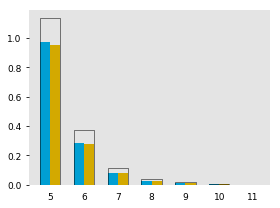

Done with plot all-recovery-stats-inset
defaultdict(<class 'int'>, {5: 5060, 7: 523, 6: 1662, 9: 70, 8: 183, 10: 24, 11: 6})
defaultdict(<class 'int'>, {5: 5060, 7: 523, 6: 1662, 9: 70, 8: 183, 10: 24, 11: 6})
Done with plot all-recovery-stats-inset


In [43]:
plot_recovery_inset('all-recovery-stats-inset', combined_stats.copy(), combined_identicals.copy(), counter_cutoff, True)
plot_recovery_inset('all-recovery-stats-inset', combined_stats.copy(), combined_identicals.copy(), counter_cutoff, False)

0 0 human
1 0 human


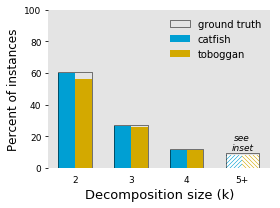

Done with plot recovery-stats-outset-human
Done with plot recovery-stats-outset-human
0 1 mouse
1 1 mouse


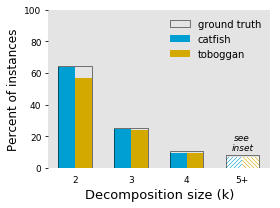

Done with plot recovery-stats-outset-mouse
Done with plot recovery-stats-outset-mouse
0 2 zebra
1 2 zebra


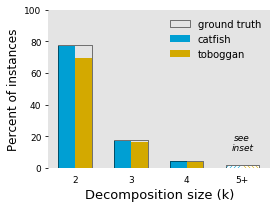

Done with plot recovery-stats-outset-zebra
Done with plot recovery-stats-outset-zebra


In [37]:
# Now do species specific

# combine all datasets
counter_cutoff = 5
alg_names = ['catfish', 'toboggan']
for idx_froot, froot in enumerate(froots):
    combined_stats = [[],[]]
    combined_identicals = [[],[]]
    for idx_alg, which_alg in enumerate(alg_names):
        print( idx_alg, idx_froot, froot)
        combined_stats[idx_alg].extend( [ int(x) for x in all_stats[idx_froot][idx_alg][:,0] ]  )
        combined_identicals[idx_alg].extend( [int(x) for x in all_stats[idx_froot][idx_alg][indices_identical[idx_froot][idx_alg],0]] )
    plot_recovery_outset( 'recovery-stats-outset-' + froot, combined_stats.copy(), combined_identicals.copy(), counter_cutoff, True)
    plot_recovery_outset( 'recovery-stats-outset-' + froot, combined_stats.copy(), combined_identicals.copy(), counter_cutoff, False)

In [7]:
# NOW DO BOXPLOTS ON INSTANCES WHERE ALGORITHM MISSES GROUNDTRUTH

def get_stats(set1, set2):
    identical = False
    if set1 == set2:
        identical = True
    len_intersect = len(set1.intersection(set2))
    jaccard = len_intersect / ( len(set1) + len(set2) - len_intersect )
    if len(set1) == 0:
        recall = 1.0
    else:
        recall = len_intersect / len(set1)

    return recall, jaccard, identical

# all_path_info, all_toboggan_data = get_all_data( [0,1,2] )
# froots = ['human', 'mouse', 'zebra']

data_catfish = {}
data_toboggan = {}
num_nontrivials = []

for froot in froots:
    gt_pathset_dict = all_path_info['groundtruth'][froot]
    toboggan_paths = all_path_info['toboggan'][froot]
    catfish_paths = all_path_info['catfish'][froot]
    
    this_catfish = []
    this_toboggan = []
    this_num_nontrivial = 0

    for key, gt_path in gt_pathset_dict.items():
        gt_size = len(gt_path)
        if gt_size == 1:  # skip trivial instances
            continue
        cat_recall, cat_jaccard, cat_identical = get_stats(gt_path, catfish_paths[key])
        tob_recall, tob_jaccard, tob_identical = get_stats(gt_path, toboggan_paths[key])
        if not cat_identical:
            this_catfish.append( (gt_size, cat_recall, cat_jaccard, key) )
        if not tob_identical:
            this_toboggan.append((gt_size, tob_recall, tob_jaccard, key) )
        this_num_nontrivial += 1
    
    data_catfish[froot] = this_catfish
    data_toboggan[froot] = this_toboggan
    num_nontrivials.append(this_num_nontrivial)

    print("On {}".format(froot))
    print("catfish has {}".format(len(this_catfish)))
    print("toboggan has {}".format(len(this_toboggan)))

On human
catfish has 18088
toboggan has 38901
On mouse
catfish has 16660
toboggan has 49028
On zebra
catfish has 9069
toboggan has 46158


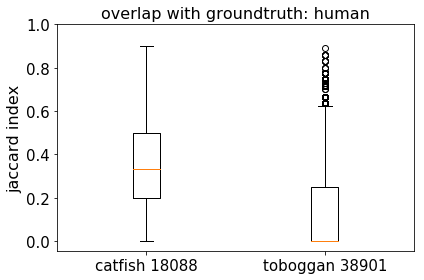

Done with plot alg-recall-


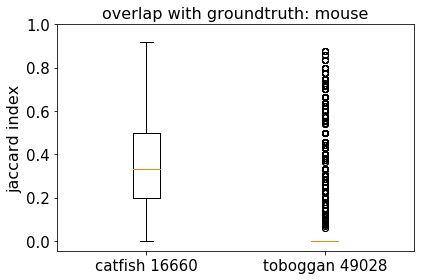

Done with plot alg-recall-


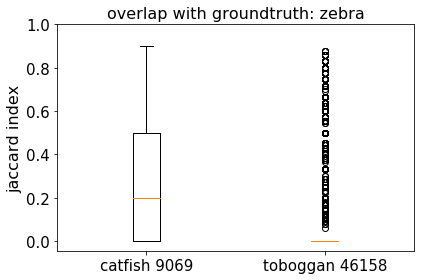

Done with plot alg-recall-


In [8]:
# Boxplots for ground truth recovery

import numpy
import matplotlib.pyplot as plt
import collections

figurename = 'alg-recall-'
alg_names = ['catfish', 'toboggan']
colors = ['red', 'blue']

show_flag = True

for idx, froot in enumerate(froots):
    
    this_catfish = data_catfish[froot]
    this_toboggan = data_toboggan[froot]
    num_nontrivial = num_nontrivials[idx]

    sizes_cat, recall_cat, jaccard_cat, keys_cat = zip(*this_catfish)
    sizes_tob, recall_tob, jaccard_tob, keys_tob = zip(*this_toboggan)

    plt.close()
    plt.clf()

    fig = plt.figure(1, figsize=(4, 3))
    ax = fig.add_subplot(111)
    ax.boxplot( [jaccard_cat, jaccard_tob] )

    plt.title('overlap with groundtruth: {}'.format(froot), fontsize=16)
    plt.ylabel('jaccard index', fontsize=16)
    ylims = plt.ylim()
    plt.ylim([ylims[0],1])
    ax.tick_params('y', labelsize=15)
    ax.set_xticklabels( [alg_names[0] + " {}".format(len(this_catfish)), alg_names[1] + " {}".format(len(this_toboggan))], fontsize=15 )
    fig.tight_layout()

    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, froot, '.pdf']), format='pdf', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, froot, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))